# Changement de variable

Le but de cet exercice est de générer une variable aléatoire normale à partir d'une variable aléatoire uniforme.

1. Générer un échantillon de 10000 valeurs tirées uniformément entre 0 et 1.
2. A partir de cet échantillon, construire un échantillon de 10000 valeurs distribuées suivant une loi normale de moyenne égale à 0.5 et d'écart-type égal à 0.2
3. Faire les histogrammes des deux échantillons.
4. Calculer la moyenne empirique et l'écart-type empirique pour le deuxième échantillon. Comparer les valeurs obtenues aux valeurs attendues.

In [ ]:
x<-runif(10000)
mu<-0.5
sigma<-0.2
y<-qnorm(x, mu, sigma)

par(mfrow = c(1,2))
options(repr.plot.width=10, repr.plot.height=4)
hist(x, breaks=100)
hist(y, breaks=100)

sprintf("The mean (sd) is: %.2f (%.2f)", mean(y), sd(y))

# Théorème central limite

Dans cet exercice, nous nous proposons de vérifier le théorème central limite empiriquement, à partir de variables aléatoires i.i.d uniforme. Soit $X\sim U(0, 1)$ et soit $S$ la somme de plusieurs réalisations de $X$ :

$$S = \sum_{i=1}^{n} X_i$$

1. Calculer la moyenne et l'écart-type de $X$.
2. On prend $n=6$. Tirer un grand nombre de fois les $X_i$ et, à chaque fois, calculer la variable centrée réduite de $S$ (que l'on notera $S'$).
3. Représenter la distribution de $S'$.
4. Superposer la loi normale centrée réduite.
5. Recommencer pour différentes valeurs de $n$.
6. Conclusions ?

In [ ]:
N=10000
Nterms=3

s = c()

min = 0
max = 1
avg = (min+max)/2
stddev = (max-min)/sqrt(12)

for (i in 1:N) {
    vars = runif(Nterms, min = min, max = max)
    s[i] = (sum(vars) - Nterms*avg)/(stddev*sqrt(Nterms))
}

hist(s, breaks=50, xlim=c(-10,10), ylim=c(0, dnorm(0)*1.2), prob=T)

pts = seq(-10, 10, by=0.1)
lines(pts, dnorm(pts))

# Visualisation de la loi de Student

Soit $X$ un échantillon de valeurs tirées suivant une loi normale de moyenne $\mu$ et écart-type $\sigma$. Nous savons que

$$Z = \frac{\bar{X} - \mu}{\sigma/\sqrt{n}}$$

est distribué suivant une loi normale centrée réduite et que 

$$T = \frac{\bar{X} - \mu}{s/\sqrt(n)}$$

avec $s^2=\frac{1}{n-1}\sum_{i=1}^{n}(X_i - \bar{X})^2$ est distribué suivant une loi de Student à $n-1$ degrés de libertés.

Le but de cet exercice est de générer et représenter les distributions de $Z$ et $T$ afin de les comparer.

1. Générer un échantillon $X$ de taille 3 avec $\mu=3$ et $\sigma=2$.
2. Répéter cela 10000 fois et, à chaque fois, calculer $Z$ et $T$.
3. Représenter les distributions de $Z$ et $T$.
4. Faire le QQ plot de $Z$ et $T$.
5. Commentaires ?

In [ ]:
n = 3
mu = 3
sd = 2

nPseudoExp = 10000

z = c()
t = c()

for(i in 1:nPseudoExp) {
    X = rnorm(n, mean = mu, sd = sd)
    z[i] = (mean(X)-mu)/(sd/sqrt(n))
    t[i] = (mean(X)-mu)/(sd(X)/sqrt(n))
}

par(mfrow = c(1, 2))
options(repr.plot.width=10, repr.plot.height=4)
hist(z, breaks=seq(floor(min(z)), ceiling(max(z)), by=0.1), xlim=c(-7, 7), col=rgb(1,0,0,0.3), prob=T)
hist(t, breaks=seq(floor(min(t)), ceiling(max(t)), by=0.1), xlim=c(-7, 7), col=rgb(0,0,1,0.3), prob=T, add=T)
x <- seq(-7, 7, length=100)
lines(x, dt(x,n-1), lwd=2)
qqplot(z, t)

## Autre solution
#library(ggplot2)
#mu.x = 100  # population value
#sd.x = 15   # population value
#n = 3       # small sample size to highlight t distribution tails
#sample.n = function(n){rnorm(n, mu.x, sd.x)}
#calculate.t = function(x){(mean(x) - mu.x)/(sd(x)/sqrt(length(x)))} # uses sample sd
#calculate.z = function(x){(mean(x) - mu.x)/(sd.x /sqrt(length(x)))} # uses population sd
#sample.ts = replicate(1000, calculate.t(sample.n(n)))
#sample.zs = replicate(1000, calculate.z(sample.n(n)))
#df = rbind(data.frame(value=sample.ts, statistic="T"),
#           data.frame(value=sample.zs, statistic="Z"))
#ggplot(df, aes(x=value, fill=statistic))+
#  geom_histogram(position="identity", binwidth=0.2, alpha=0.5)+
#  scale_x_continuous(limits=c(-5,5))

# Test de Student (source : [ici](http://www.real-statistics.com/students-t-distribution/one-sample-t-test/)):

Un programme de reduction de poids prétend réduire l'obésité. Pour le vérifier, le programme est appliqué à 12 personnes et la variation de poids pour chacun d'eux est mesurée après 2 ans. La perte de poids pour chaque personne est donnée dans la table ci-dessous (les valeurs négatives indiquent un gain de poids à l'issu du programme).
Peut-on conclure de ces résultats que le programme réduit bien l'obésité ?

| Personne | Différence de poids |
|---------|-------------|
| 1       | 23          |
| 2       | 15          |
| 3       | -5          |
| 4       | 7           |
| 5       | 1           |
| 6       | -10         |
| 7       | 12          |
| 8       | -8          |
| 9       | 20          |
| 10      | 8           |
| 11      | -2          |
| 12      | -5          |

In [ ]:
sample = c(23, 15, -5, 7, 1, -10, 12, -8, 20, 8, -2, -5)

n = length(sample)
m = mean(sample)
sigma = sd(sample)
err = sigma/sqrt(n)
n
m
sigma
err
mu = 0
t = (m-mu)/err
t
alpha = 0.05
tcrit = qt(1-alpha, n-1)
tcrit
pvalue = 1 - pt(t, n-1)
pvalue

# Or use right away the redefined R functionalities
t.test(sample, mu=0, alternative="greater")

# Empirical verifications of assumptions
options(repr.plot.width=4, repr.plot.height=4)
boxplot(sample)
grid()

print("Conclusion: the weight loss is, at the 95% CL, not different from 0.")

# Test de Student (source : d'[ici](http://www.real-statistics.com/students-t-distribution/one-sample-t-test/)): 

Il y a 30 ans, la note moyenne des étudiants dans une promotion était de 78 sur 100. Afin de voir si la note moyenne a  évoluée en 30 ans, un test est réalisé cette année sur 40 étudiants. Les notes obtenues sont les suivantes :

|    |    |    |    |
|----|----|----|----|
| 63 | 58 | 76 | 59 |
| 95 | 84 | 83 | 68 |
| 81 | 90 | 87 | 45 |
| 75 | 38 | 54 | 52 |
| 90 | 100 | 45 | 76 | 
| 64 | 80 | 58 | 78 | 
| 45 | 68 | 64 | 50 |
| 59 | 49 | 63 | 75 | 
| 72 | 68 | 92 | 64 |
| 35 | 60 | 87 | 86 |

Peut-on dire que la note moyenne a changée en 30 ans ? (Dans ce cas on considère les variations à la baisse et à la hausse, on réalise donc un test bilatéral)

In [ ]:
sample = c(63, 58, 76, 59,
           95, 84, 83, 68,
           81, 90, 87, 45,
           75, 38, 54, 52,
           90, 100, 45, 76, 
           64, 80, 58, 78, 
           45, 68, 64, 50,
           59, 49, 63, 75, 
           72, 68, 92, 64,
           35, 60, 87, 86)
options(repr.plot.width=8, repr.plot.height=4)
par(mfrow = c(1, 2))
hist(sample, breaks=20)
boxplot(sample)
grid()

n = length(sample)
t = (mean(sample) - 78)/(sd(sample)/sqrt(n))
t
pvalue = pt(t, n-1)*2 # probability on left-side tail, as the observed value of the test is negative
pvalue

# Histogramme (source : livre B. Clément p27)

On dispose de 50 mesures de la distance d'interaction, en cm, d'un photon $\gamma$ de $662~$keV dans du germanium :

3.088, 3.544, 5.014, 0.386, 1.448, 1.749, 1.398, 2.255, 4.084, 0.673, 

4.085, 0.625, 4.899, 0.615, 4.029, 1.906, 2.094, 1.726, 0.388, 6.589,

0.782, 3.807, 1.552, 1.955, 2.434, 3.683, 1.617, 1.811, 0.989, 4.388,

1.706, 0.969, 0.524, 2.206, 2.955, 6.445, 0.81, 0.98, 6.407, 2.01,

2.431, 0.748, 0.041, 1.019, 1.709, 1.418, 1.535, 2.068, 1.18, 1.064

1. Calculez la moyenne et l'écart-type de l'échantillon.
2. Déterminez le coefficient d'asymétrie et le kurtosis.
3. D'après vos résultats, quelle forme attend-on pour l'histogramme ?
4. Construisez la table de fréquences et l'histogramme avec des classes de $0.3~$cm, $1.2~$cm et $3~$cm de large.
5. Calculez la moyenne et l'écart-type à partir des tables de fréquences, avec et sans corrections de Sheppard (pour l'écart-type) ($\Delta_{Sheppard} = -\frac{1}{12}\delta^2$ où $\delta$ est la largeur des classes).
6. Calculez la médiane pour l'échantillon.

In [ ]:
sample <- c(3.088, 3.544, 5.014, 0.386, 1.448,
           1.749, 1.398, 2.255, 4.084, 0.673, 
           4.085, 0.625, 4.899, 0.615, 4.029,
           1.906, 2.094, 1.726, 0.388, 6.589,
           0.782, 3.807, 1.552, 1.955, 2.434,
           3.683, 1.617, 1.811, 0.989, 4.388,
           1.706, 0.969, 0.524, 2.206, 2.955, 
           6.445, 0.81, 0.98, 6.407, 2.01,
           2.431, 0.748, 0.041, 1.019, 1.709, 
           1.418, 1.535, 2.068, 1.18, 1.064)

# Question 1 :
# ------------

sprintf("mean = %f", mean(sample))
sprintf("standard deviation (unbiased) = %f", sd(sample))
n <- length(sample)
sprintf("standard deviation (biased) = %f", sd(sample)*sqrt((n-1)/n))

# Question 2 :
# ------------

library(moments)
sprintf("skewness = %f", skewness(sample))
sprintf("kurtosis = %f", kurtosis(sample))

# Question 3 (cf livre B. Clement) : 
# ----------------------------------
#
#  -> histogramme centré sur 2.23 cm qui s'etire sur la droite et assez piquée

# Question 4 :
# ------------

library(repr)
options(repr.plot.width=9, repr.plot.height=3)

# This function computes the number of bins and maxval of the histogram
myfunction <- function(sample, binWidth){
    max(sample)
    max(sample)/w
    nBins <- ceiling(max(sample)/w)
    maxVal <- nBins*w
    return(c(nBins, maxVal))
}

# This splits the graphics window into 3 pads
par(mfrow = c(1, 3))

w <- 3
res <- myfunction(sample, w)
h1 <- hist(sample, breaks=seq(0, res[2], length.out=res[1]+1))
h1$breaks
h1$counts

w <- 1.2
res <- myfunction(sample, w)
h2 <- hist(sample, breaks=seq(0, res[2], length.out=res[1]+1))
h2$breaks
h2$counts

w <- 0.3
res <- myfunction(sample, w)
h3 <- hist(sample, breaks=seq(0, res[2], length.out=res[1]+1))
h3$breaks
h3$counts

# Question 5 :
# ------------

# First, let's see what quantities are available for each histogram:
h1

# Now do the calculation
meanh1 <- 1/n*sum(h1$counts*h1$mids)
meanh1
meanh2 <- 1/n*sum(h2$counts*h2$mids)
meanh2
meanh3 <- 1/n*sum(h3$counts*h3$mids)
meanh3

sdh1 <- sqrt(1/n*sum(h1$counts*(h1$mids-meanh1)^2))
sdh1
sdh2 <- sqrt(1/n*sum(h2$counts*(h2$mids-meanh2)^2))
sdh2
sdh3 <- sqrt(1/n*sum(h3$counts*(h3$mids-meanh3)^2))
sdh3

# Question 6 :
# ------------

# From sample
medianSample <- median(sample)
medianSample

# Régression linéaire (source : livre B. Clément p. 28)

Lors d'une séance de travaux pratiques, les étudiants doivent mesurer la valeur d'une résistance. Pour mesurer la valeur de la résistance, chaque étudiant dispose d'un voltmètre, d'un ampèremètre et d'un générateur de tension variable. Chacun mesure le courant et la tension pour cinq réglages différents du générateur. Un étudiant a obtenu les résultats suivants :

Mesure (U en V, I en mA) : (0.204; 1.05), (1.23; 2.72), (2.04; 5.02), (3.48; 6.59), (4.93; 10.9)

1. Déterminez les coefficients de la droite de régression $U=aI+b$. En déduire la valeur de $R$. 
2. Refaites le calcul de la régression linéaire en forcant $b=0$.
3. Quel résultat obtiendrait-on en ajustant $I=a'U + b'$ ?

In [ ]:
U <- c(0.204, 1.23, 2.04, 3.48, 4.83)
I <- c(1.05, 2.72, 5.02, 6.59, 10.9)
I <- I*1e-3
options(repr.plot.width=5, repr.plot.height=4)
plot(I, U)

n <- length(U)

# Question 1 :
a <- (n*sum(U*I)-sum(U)*sum(I))/(n*sum(I^2) - sum(I)^2)
a
b <- 1/n*(sum(U)-a*sum(I))
b
r <- a*sd(I)/sd(U)
r^2

# Question 2 :
a2 <- sum(U*I)/sum(I^2)
a2

# Question 3 : 
a3 <- (n*sum(U*I)-sum(U)*sum(I))/(n*sum(U^2) - sum(U)^2)
a3
b3 <- 1/n*(sum(I)-a3*sum(U))
b3
1/a3

# Différence entre régression linéaire et méthode des moindres carrés (source : livre B. Clément p. 98)

Considérons les quatres points de mesure suivant :

$$x_i = (1, 2.2, 3.5, 5)$$
$$y_i = (1, 10, 3, 25)$$
$$\Delta y_i = (0.5, 2, 10, 1.2)$$

1. Trouver la fonction qui ajuste au mieux ces points par régression linéaire.
2. Trouver la fonction qui ajuste au mieux ces points par la méthode des moindres carrés.
3. Commenter les différences.


Call:
lm(formula = y ~ x, data = ds)

Residuals:
     1      2      3      4 
 0.894  3.882 -9.631  4.855 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)
(Intercept)   -4.904      8.961  -0.547    0.639
x              5.010      2.730   1.835    0.208

Residual standard error: 8.13 on 2 degrees of freedom
Multiple R-squared:  0.6274,	Adjusted R-squared:  0.4411 
F-statistic: 3.367 on 1 and 2 DF,  p-value: 0.2079


[1] 0.7920738


Call:
lm(formula = y ~ x, data = ds, weights = 1/dy^2)

Weighted Residuals:
      1       2       3       4 
-0.1273  0.8673 -1.3067 -0.0581 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)   
(Intercept)  -4.9379     0.7695  -6.417  0.02343 * 
x             6.0015     0.3595  16.693  0.00357 **
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.113 on 2 degrees of freedom
Multiple R-squared:  0.9929,	Adjusted R-squared:  0.9893 
F-statistic: 278.7 on 1 and 2 DF,  p-value: 0.00357


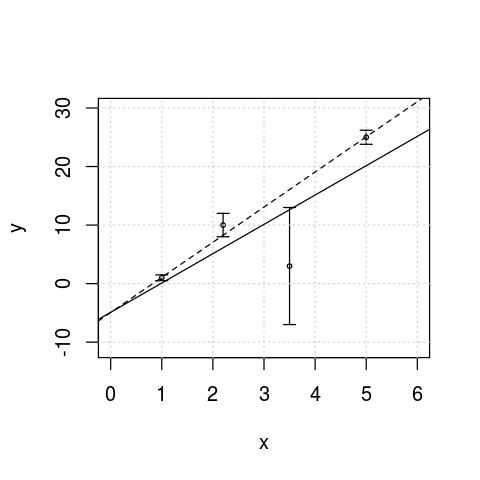

In [24]:
x = c(1, 2.2, 3.5, 5)
y = c(1, 10, 3, 25)
dy = c(0.5, 2, 10, 1.2)

options(repr.plot.width=4, repr.plot.height=4)
plot(x, y, ylim=c(-11, 30), xlim=c(0, 6), cex=0.5)
arrows(x, y-dy, x, y+dy, angle=90, code=3, length=0.05)
grid()       

ds <- data.frame(x = x, y = y, dy = dy)

# Linear regression
model = lm(y~x, data=ds)
summary(model)
rsq = summary(model)$r.squared
sqrt(rsq)
abline(model)

model2 = lm(y~x, data=ds, weights=1/dy^2)
summary(model2)
abline(model2, lty=2)